# Data Processing
## Computational Methods in Psychology (and Neuroscience)
### Psychology 4500/7559 --- Fall 2020
By: Per B. Sederberg, PhD



# Lesson Objectives

Upon completion of this lesson, students should have learned:

1. Read data from slog files
2. The Series and DataFrame data structures in Pandas
3. Load slogs as a DataFrame
4. Some basic operations on the data


# Updating SMILE

- First you can test whether there is a new version Kivy, which is the primary dependency of SMILE:

```bash
conda install -c conda-forge kivy==1.11.1
```

- Then you can update SMILE right from the GitHub repository (note the upgrade option at the end):

```bash
pip install git+https://github.com/compmem/smile --upgrade
```

# Math Distract

- Sometimes you want to have a delay period, e.g., between study and test
- Although it may be fine to have an empty delay, often you'd like to fill it with a task that prevents rehearsal of the studied items
- We provide a subroutine that generates math problems!

In [44]:
from smile.common import *
from smile.math_distract import MathDistract

exp = Experiment(show_splash=False, resolution=(1024,768))

Wait(1.0)
MathDistract(num_vars=3,
             min_num=1,
             max_num=9,
             max_probs=50,
             duration=20)
    
exp.run()

# Moving Dot stimuli

- A class of stimuli at the core of many studies of perceptual decision-making
- We provide a custom state for it:

In [45]:
from smile.common import *
from smile.moving_dots import MovingDots

exp = Experiment(show_splash=False, resolution=(1024,768))

# set up some config
dot_speed = 180

# set initial values
exp.cr=0.2
exp.cl=0.2
motion_props = [{"coherence": exp.cr, "direction": 0, "direction_variance": 0},
                {"coherence": exp.cl, "direction": 180, "direction_variance": 0}]
with Loop():
    with Parallel():
        dots = MovingDots(color='white', scale=3, num_dots=100, radius=200,
                                motion_props=motion_props, speed=dot_speed,
                                lifespan=0.5, lifespan_variance=1.5)
        lr = Label(text='Right Coherence:\n'+Ref(str,exp.cr), left=dots.right+40, font_size=28) 
        ll = Label(text='Left Coherence:\n'+Ref(str,exp.cl), right=dots.left-40, font_size=28)

    with UntilDone():
            kp = KeyPress(keys=['UP','DOWN','LEFT','RIGHT'])
            with If(kp.pressed=='UP'):
                exp.cr=exp.cr+0.05
                exp.cl=exp.cl+0.05
                with If(exp.cr+exp.cl>1.0):
                    exp.cr=exp.cr-0.05
                    exp.cl=exp.cl-0.05
            with Elif((kp.pressed=='DOWN')):
                exp.cr=exp.cr-0.05
                exp.cl=exp.cl-0.05
                with If(exp.cr<0.05):
                    exp.cr=0.0
                with If(exp.cl<0.05):
                    exp.cl=0.0
            with Elif(kp.pressed=='LEFT'):
                exp.cl=exp.cl+0.05
                with If(exp.cr+exp.cl>1.0):
                    exp.cl=exp.cl-0.05
            with Elif(kp.pressed=='RIGHT'):
                exp.cr=exp.cr+0.05
                with If(exp.cr+exp.cl>1.0):
                    exp.cr=exp.cr-0.05
            # update the motion props
            dots.update(motion_props=[{"coherence": exp.cr, "direction": 0},
                                      {"coherence": exp.cl, "direction": 180}])
            lr.update(text='Right Coherence:\n'+Ref(str,exp.cr))
            ll.update(text='Left Coherence:\n'+Ref(str,exp.cl))
with UntilDone():
    KeyPress(keys=['ENTER'])

    
exp.run()

# Reading in slog files

- SMILE stores data in log files with the `.slog` file extension
- It is a custom format that are pickled and compressed dictionaries
- We can read them in with a SMILE function `log2dl` that converts the log to a list of dictionaries (i.e., a dict list):

In [46]:
from smile.log import log2dl
dl = log2dl('log_MD_0.slog')
dl[:2]

[{'rt': 2.941615221919392,
  'disappear_time_error': 0.0,
  'disappear_time_time': 617.657840390051,
  'run_num': 0,
  'refresh_rate': 26.731467774154293,
  'appear_time_error': 0.0,
  'appear_time_time': 614.7072808193332,
  'eeg_pulse_time': None,
  'right_coherence': 0.06,
  'left_coherence': 0.0,
  'press_time_error': 0.0005104763318968253,
  'press_time_time': 617.6488960412526,
  'incorrect_resp': '1',
  'pressed': '1',
  'log_time': 618.1488960412526,
  'correct_resp': '4',
  'correct': False,
  'fmri_tr_time': None,
  'log_num': 0},
 {'rt': 1.5730700115865375,
  'disappear_time_error': 0.0,
  'disappear_time_time': 620.2500236883183,
  'run_num': 0,
  'refresh_rate': 26.59035375261749,
  'appear_time_error': 0.0,
  'appear_time_time': 618.6663967214259,
  'eeg_pulse_time': None,
  'right_coherence': 0.24,
  'left_coherence': 0.3,
  'press_time_error': 0.00047487459045214564,
  'press_time_time': 620.2394667330125,
  'incorrect_resp': '4',
  'pressed': '4',
  'log_time': 620.739

# Pandas

- Library at the core of most data science with Python
- Provides two key data structures: `Series` and `DataFrame`
- The key feature of Pandas is that ***data alignment is intrinsic***. 
  - The link between labels and data will not be broken unless done so explicitly by you.


## Series

- A `Series` is a one-dimensional labeled array capable of holding any data type:
  - integers, strings, floating point numbers, Python objects, etc...
- The axis labels are collectively referred to as the index. 

In [3]:
import pandas as pd
import numpy as np

s = pd.Series(np.random.randn(5))
s

0   -0.023272
1   -0.921768
2   -2.679155
3   -0.823877
4   -2.134610
dtype: float64

In [4]:
# you can specify the index
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    1.482528
b   -0.377511
c    1.875236
d    1.089316
e   -0.978238
dtype: float64

## Series are ndarray-like

- You can slice a series and it will also slice your index
- And many of the same methods are available (e.g., mean, sum, etc...)


In [5]:
s[2:]

c    1.875236
d    1.089316
e   -0.978238
dtype: float64

In [47]:
s.mean()

0.6182659372161396

In [6]:
s[s > s.mean()]

a    1.482528
c    1.875236
d    1.089316
dtype: float64

## Series is also dict-like

- A Series is like a fixed-size dict in that you can get and set values by index label

In [7]:
s['d']

1.0893155918148905

In [49]:
'd' in s

True

## Series keeps array operations aligned

- Series can also be passed into most NumPy methods expecting an ndarray.
- Alignment will be maintained

In [9]:
s+s

a    2.965055
b   -0.755022
c    3.750472
d    2.178631
e   -1.956477
dtype: float64

In [10]:
np.exp(s)

a    4.404063
b    0.685566
c    6.522357
d    2.972239
e    0.375973
dtype: float64

In [11]:
s[1:] + s[:-1]

a         NaN
b   -0.755022
c    3.750472
d    2.178631
e         NaN
dtype: float64

In [60]:
x = pd.Series(np.random.randn(5)*10)
x.astype(np.int)

0     0
1   -16
2    16
3     3
4    16
dtype: int64

## DataFrame

- `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. 
- You can think of it like a spreadsheet or SQL table, or a dict of `Series` objects.
- It's possible to create a DataFrame a lot of different ways.

In [61]:
# e.g., from a dictionary
d = {'one': [1., 2., 3., 4.],
     'two': [4., 3., 2., 1.]}
df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
df

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


## Column selection, addition, deletion

- You can treat a DataFrame like a dict of Series objects

In [13]:
# pick a column
df['one']

a    1.0
b    2.0
c    3.0
d    4.0
Name: one, dtype: float64

In [62]:
# make new columns
df['three'] = df['one'] + df['two']
df['thresh'] = df['one'] > 2.0
df

,one,two,three,thresh
a,1.0,4.0,5.0,False
b,2.0,3.0,5.0,False
c,3.0,2.0,5.0,True
d,4.0,1.0,5.0,True


In [64]:
df.dtypes

one       float64
two       float64
three     float64
thresh       bool
dtype: object

In [15]:
# you can delete with del or pop
del df['two']
df.pop('three')
df

,one,thresh
a,1.0,False
b,2.0,False
c,3.0,True
d,4.0,True


In [16]:
# new values will populate the entire column
df['foo'] = 'bar'
df

,one,thresh,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,4.0,True,bar


## Indexing and Selection

  - loc
  - iloc
  - boolean
  - column


In [17]:
df.loc[df['one']>2]

,one,thresh,foo
c,3.0,True,bar
d,4.0,True,bar


In [68]:
df

,one,two,three,thresh
a,1.0,4.0,5.0,False
b,2.0,3.0,5.0,False
c,3.0,2.0,5.0,True
d,4.0,1.0,5.0,True


In [71]:
# pick columns of interest
df[['one', 'three']]

,one,three
a,1.0,5.0
b,2.0,5.0
c,3.0,5.0
d,4.0,5.0


In [74]:
# pick rows by index
df.loc[['b', 'c']]

,one,two,three,thresh
b,2.0,3.0,5.0,False
c,3.0,2.0,5.0,True


In [77]:
# pick rows by numeric index
df.iloc[[1, 3]]

,one,two,three,thresh
b,2.0,3.0,5.0,False
d,4.0,1.0,5.0,True


In [82]:
# pick rows by boolean index
df2 = df[(df['two']>2) & (df['one']<=1)]

In [88]:
# pick rows by boolean index
df3 = df.loc[(df['two']>2) & (df['one']<=1), ['two', 'three']]
df3

,two,three
a,4.0,5.0


## SMILE and Pandas

- We can create a DataFrame from a dict list in SMILE:

In [92]:
dl = log2dl('log_MD_0.slog')
df = pd.DataFrame(dl)
df.head(5)

,rt,disappear_time_error,disappear_time_time,run_num,refresh_rate,appear_time_error,appear_time_time,eeg_pulse_time,right_coherence,left_coherence,press_time_error,press_time_time,incorrect_resp,pressed,log_time,correct_resp,correct,fmri_tr_time,log_num
0,2.941615,0.0,617.657840,0,26.731468,0.0,614.707281,None,0.06,0.00,0.000510,617.648896,1,1,618.148896,4,False,None,0
1,1.573070,0.0,620.250024,0,26.590354,0.0,618.666397,None,0.24,0.30,0.000475,620.239467,4,4,620.739467,1,False,None,0
2,2.810989,0.0,624.100785,0,27.489738,0.0,621.275211,None,0.00,0.00,0.000544,624.086200,1,4,624.586200,4,True,None,0
3,0.872496,0.0,625.751111,0,27.255089,0.0,624.850929,None,0.00,0.24,0.001483,625.723425,4,1,626.223425,1,True,None,0
4,1.818831,0.0,628.618369,0,26.489366,0.0,626.784654,None,0.00,0.12,0.000755,628.603485,4,1,629.103485,1,True,None,0


# A quick summary

- You can use the `describe` method to get a quick summary of your data frame

In [19]:
df.describe()

,rt,disappear_time_error,disappear_time_time,run_num,refresh_rate,appear_time_error,appear_time_time,right_coherence,left_coherence,press_time_error,press_time_time,log_time,log_num
count,248.000000,248.0,248.000000,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.0
mean,0.804588,0.0,1481.126965,1.500000,26.667593,0.0,1480.307270,0.150000,0.150000,0.001204,1481.111858,1481.611858,0.0
std,0.383854,0.0,601.187932,1.120295,0.854239,0.0,601.233562,0.104552,0.104552,0.005860,601.187790,601.187790,0.0
min,0.252737,0.0,617.657840,0.000000,21.059205,0.0,614.707281,0.000000,0.000000,0.000430,617.648896,618.148896,0.0
25%,0.558839,0.0,1008.340282,0.750000,26.397669,0.0,1007.321325,0.060000,0.060000,0.000497,1008.328116,1008.828116,0.0
50%,0.678502,0.0,1532.049636,1.500000,26.717780,0.0,1530.628267,0.150000,0.150000,0.000519,1532.033580,1532.533580,0.0
75%,0.926857,0.0,2005.156651,2.250000,27.143314,0.0,2004.558631,0.240000,0.240000,0.000547,2005.143065,2005.643065,0.0
max,2.941615,0.0,2243.141804,3.000000,28.609071,0.0,2241.983237,0.300000,0.300000,0.069283,2243.130664,2243.630664,0.0


# Some data clean-up

In [94]:
df.columns

Index(['rt', 'disappear_time_error', 'disappear_time_time', 'run_num',
       'refresh_rate', 'appear_time_error', 'appear_time_time',
       'eeg_pulse_time', 'right_coherence', 'left_coherence',
       'press_time_error', 'press_time_time', 'incorrect_resp', 'pressed',
       'log_time', 'correct_resp', 'correct', 'fmri_tr_time', 'log_num',
       'coh_diff', 'log_rt'],
      dtype='object')

In [98]:
# let's add a new column for the absolute value of the coherence difference
df['coh_diff'] = np.abs(df['right_coherence'] - df['left_coherence'])

# and make a log rt
df['log_rt'] = np.log(df['rt'])

df['trial_num'] = np.arange(len(df))

df = df[['run_num', 'trial_num', 'rt', 'log_rt', 'coh_diff',   
         'right_coherence', 'left_coherence', 'appear_time_time',
         'press_time_error', 'press_time_time', 'incorrect_resp', 'pressed',
         'correct_resp', 'correct']]

# show it
df.head()

,run_num,trial_num,rt,log_rt,coh_diff,right_coherence,left_coherence,appear_time_time,press_time_error,press_time_time,incorrect_resp,pressed,correct_resp,correct
0,0,0,2.941615,1.078959,0.06,0.06,0.00,614.707281,0.000510,617.648896,1,1,4,False
1,0,1,1.573070,0.453029,0.06,0.24,0.30,618.666397,0.000475,620.239467,4,4,1,False
2,0,2,2.810989,1.033537,0.00,0.00,0.00,621.275211,0.000544,624.086200,1,4,4,True
3,0,3,0.872496,-0.136397,0.24,0.00,0.24,624.850929,0.001483,625.723425,4,1,1,True
4,0,4,1.818831,0.598194,0.12,0.00,0.12,626.784654,0.000755,628.603485,4,1,1,True


# Grouping data

- The `groupby` method allows you to create different groupings of your data

In [99]:
df.columns

Index(['run_num', 'trial_num', 'rt', 'log_rt', 'coh_diff', 'right_coherence',
       'left_coherence', 'appear_time_time', 'press_time_error',
       'press_time_time', 'incorrect_resp', 'pressed', 'correct_resp',
       'correct'],
      dtype='object')

In [101]:
df.groupby('coh_diff')['correct'].count()

coh_diff
0.00    48
0.06    40
0.12    64
0.18    48
0.24    32
0.30    16
Name: correct, dtype: int64

In [106]:
ucd = df['coh_diff'].unique()
ucd.sort()
ucd
for cd in ucd:
    print(cd, df.loc[df['coh_diff']==cd, 'correct'].mean())

0.0 0.6041666666666666
0.06 0.75
0.12 0.78125
0.18 0.9583333333333334
0.24 0.90625
0.3 1.0


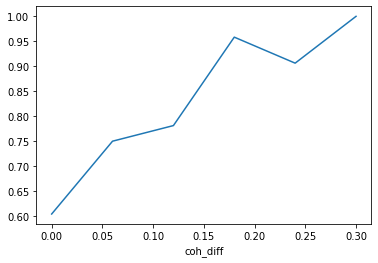

In [109]:
# let's look at performance as a function of coh_diff
df.groupby('coh_diff')['correct'].mean().plot()

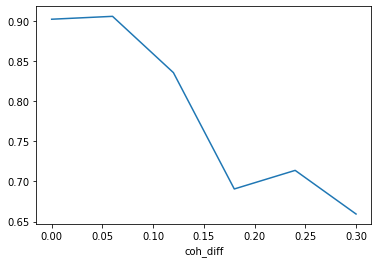

In [111]:
# how about rts
df.groupby('coh_diff')['rt'].mean().plot()

In [117]:
# you can group by more than one column
df.groupby(['correct', 'coh_diff'])['rt'].mean()

correct  coh_diff
False    0.00        0.829746
         0.06        1.036445
         0.12        0.783893
         0.18        0.884447
         0.24        0.834226
True     0.00        0.949310
         0.06        0.861958
         0.12        0.849955
         0.18        0.682256
         0.24        0.701371
         0.30        0.659511
Name: rt, dtype: float64

In [118]:
# you can group by more than one column
df.groupby(['correct'])['rt'].mean()

correct
False    0.861994
True     0.790811
Name: rt, dtype: float64

In [121]:
# is there a speed bias?
df.groupby(['correct_resp'])['log_rt'].mean()

correct_resp
1   -0.323040
4   -0.277191
Name: log_rt, dtype: float64

In [120]:
# is there an accuracy bias?
df.groupby(['correct_resp'])['correct'].mean()

correct_resp
1    0.879032
4    0.733871
Name: correct, dtype: float64

## Assignment before next class

- We will post experiments for you to run, along with instructions for how to upload the data
- This will be due by ***Wednesday*** next week, so that we can prepare the data for class

### See you next week!!!